In [1]:
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
X_train = X_train.reshape(60000, 28,28,1)
X_test = X_test.reshape(10000, 28,28,1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [4]:

X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

X_train[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [5]:
import numpy as np
unique_elements, counts_elements = np.unique(y_train, return_counts=True)

unique_elements, counts_elements

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [6]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((48000, 28, 28, 1), (48000, 10), (12000, 28, 28, 1), (12000, 10))

In [8]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(215, (3,3), activation='relu'))
model.add(layers.Conv2D(518, (3,3), activation='relu'))
model.add(layers.Conv2D(1024, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 215)       247895    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 518)       1002848   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 1024)      4774912   
_________________________________________________________________
flatten (Flatten)            (None, 409600)            0         
_________________________________________________________________
dense (Dense)                (None, 10)                4096010   
Total params: 10,122,945
Trainable params: 10,122,945
Non-trainable params: 0
____________________________________________

In [9]:
%%time
# 1시간 10분 소요
Hist = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/100
94/94 [==============================] - 100s 602ms/step - loss: 0.7982 - accuracy: 0.7726 - val_loss: 0.0794 - val_accuracy: 0.9776
Epoch 2/100
94/94 [==============================] - 42s 442ms/step - loss: 0.0578 - accuracy: 0.9832 - val_loss: 0.0559 - val_accuracy: 0.9847
Epoch 3/100
94/94 [==============================] - 41s 441ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.0529 - val_accuracy: 0.9862
Epoch 4/100
94/94 [==============================] - 41s 441ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0463 - val_accuracy: 0.9883
Epoch 5/100
94/94 [==============================] - 41s 441ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0421 - val_accuracy: 0.9886
Epoch 6/100
94/94 [==============================] - 41s 441ms/step - loss: 0.0111 - accuracy: 0.9966 - val_loss: 0.0502 - val_accuracy: 0.9883
Epoch 7/100
94/94 [==============================] - 41s 441ms/step - loss: 0.0100 - accuracy: 0.9962 - val_loss: 0.0602 - val_accuracy

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 5s 14ms/step - loss: 0.1044 - accuracy: 0.9900
Loss = 0.10443
Accuracy = 0.99000


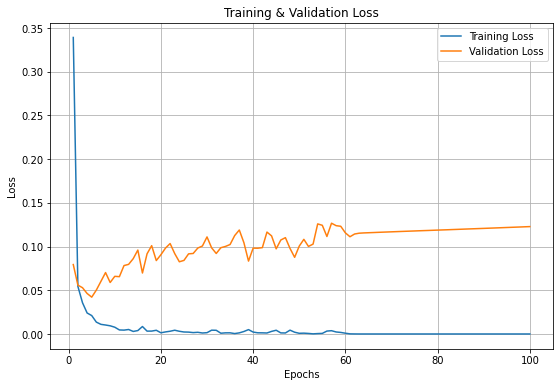

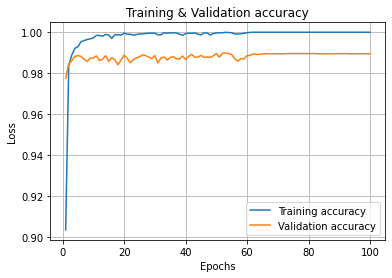

In [11]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()